# Table of Contents

0.1 Importing Libraries

0.2 Importing Data

0.3 Exploring Original Df

0.4 Defining styles and labels formats

0.5 Random sampling of 30% of data

0.6 Creating vizualizations

    0.6.1  Bar chart number of orders by day of the week
    
    0.6.2  Scatterplot of prices
    
    0.6.3  Histogram of prices
    
    0.6.4  Line chart of prices by day of week (random 30% sample)
    
    0.6.5 Histogram of orders by hour of day
    
    0.6.6 Bar chart number of orders by loyalty status
    
    0.6.7 Line chart of prices vs. hours of the day (random 30% sample)
    
    0.6.8 Line chart of age vs. number of dependants (random 30% sample)
    
    0.6.9 Scatterplot of age vs. income (random 30% sample)
    
    0.6.10 Stacked bar chart - spender_type by region
    


NOTE: The sequence of visualizations in the script matches the order in which they were requested by the client (a.k.a. CareerFoundry instructions)

### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_merged2.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all2.pkl'))

### 0.3 Exploring Original df

In [4]:
df.shape

(32434489, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 39 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   order_id                     int64         
 1   user_id                      int64         
 2   order_number                 int16         
 3   order_day_of_week            int8          
 4   order_hour_of_day            int8          
 5   days_since_prior_order       float16       
 6   first_order_of_new_customer  bool          
 7   product_id                   int32         
 8   add_to_cart_order            int16         
 9   reordered                    int8          
 10  product_name                 object        
 11  aisle_id                     float16       
 12  department_id                float16       
 13  price                        float32       
 14  product_info_available       bool          
 15  price_available              bool          
 16

In [6]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,...,date_joined,n_dependants,fam_status,income,region,low_activity_flag,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2019-02-17,3,married,40423,South,False,31.6,375.700012,59,5.898438
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,2019-02-17,3,married,40423,South,False,31.6,375.700012,59,5.898438
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,2019-02-17,3,married,40423,South,False,31.6,375.700012,59,5.898438
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,2019-02-17,3,married,40423,South,False,31.6,375.700012,59,5.898438
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,2019-02-17,3,married,40423,South,False,31.6,375.700012,59,5.898438


In [7]:
df.isnull().sum()

order_id                             0
user_id                              0
order_number                         0
order_day_of_week                    0
order_hour_of_day                    0
days_since_prior_order         2078068
first_order_of_new_customer          0
product_id                           0
add_to_cart_order                    0
reordered                            0
product_name                     30770
aisle_id                         30770
department_id                    30770
price                            35897
product_info_available               0
price_available                      0
price_range                      35897
busiest_day                          0
busiest_days                         0
busiest_period_of_day                0
max_order                            0
loyalty_flag                         0
mean_spending                        0
spender_type                         0
median_days_since_ordering           0
frequent_shopper         

All nulls have been previously accounted for and labeled appropriately with flags.

### 0.4 Defining styles and label formats

In [8]:
# Creating a consistent style for titles and axis labels
font_title = {'family':'serif','color':'forestgreen','size':20}
font_sm_title = {'family':'serif','color':'forestgreen','size':16}
font_label = {'family': 'serif', 'color' :'forestgreen', 'size':15}
font_sm_label = {'family': 'serif', 'color' :'forestgreen', 'size':13}

In [9]:
# Identifying the days of the week that go with the code in the df
# 0 = Sat, 1 = Sun, etc.
dow = ('Sat', 'Sun', 'Mon', 'Tues', 'Weds', 'Thurs', 'Fri')
dow_xticks = np.arange(len(dow))

In [10]:
# Identifying the hours of the day that go with the code in the df
# 0 = 12 a.m., 1 = 1 a.m.... 13 = 1 p.m., etc.
hod = ('Midnight','1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', 
       '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
       'Noon', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', 
       '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.')
hod_xticks = np.arange(len(hod))

### 0.5 Random sampling of 30% of data 

In [11]:
# Assign a random number between 0-1 to each row of the df
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [12]:
# Split the df into two samples
# big = 70% of df
# small = 30% of df
big = df[dev]
small = df[~dev]

In [13]:
# Compare the sample dfs to the original
len(df)

32434489

In [14]:
len(big) + len(small)

32434489

This random sampling can be used for any line charts where using the full df would be too memory-intensive.

### 0.6.1 Bar chart number of orders by day of the week

Text(0.5, 1.0, 'Customers order more items\non the weekend.')

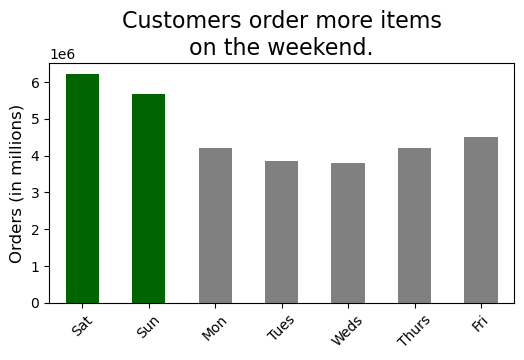

In [15]:
# Make a bar chart for order_day_of_week
bar = df['order_day_of_week'].value_counts().sort_index().plot.bar(color =['darkgreen', 'darkgreen', 'grey', 'grey', 'grey', 'grey', 'grey'], figsize=(6,4))

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.xticks(dow_xticks, dow, rotation = 45)
plt.xlabel("")

plt.ylabel("Orders (in millions)", size=12 )

plt.title ("Customers order more items\non the weekend.", 
           size=16)

In [ ]:
# Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 0.6.2 Scatterplot of prices

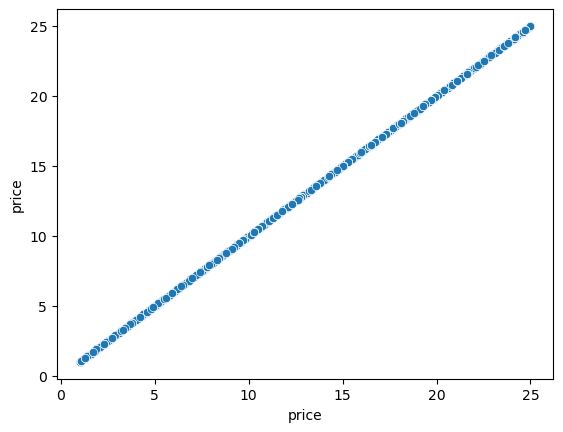

In [17]:
# Making a scatterplot to confirm that there are no longer significant outliers
scat_plot = sns.scatterplot(x = 'price', y = 'price',data = df)

# I'm not taking the time to format this in any particular way because
# because it was only for internal/analyst use to locate the outliers.

In [18]:
# Exporting scatterplot
scat_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices.png'))

### 0.6.3 Histogram of prices

Text(0.5, 1.0, 'Histogram of Prices')

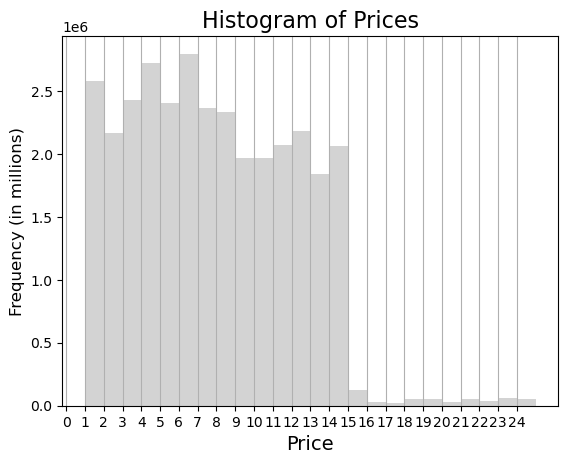

In [9]:
# Making histogram of prices
hist_prices = df['price'].plot.hist(bins = 24, color = 'lightgrey')

# Format labels and titles for clarity
hist_xticks = np.arange(0,25,1)
plt.xticks(hist_xticks)
plt.xlabel("Price", size=14)
plt.grid(axis = 'x')

plt.ylabel("Frequency (in millions)", size=12 )

plt.title ("Histogram of Prices", size=16)

In [10]:
# Exporting histogram
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

### 0.6.4 Line chart of prices by day of week (using random 30% sample)

In [15]:
# Creating two-column subset of the 30% df
df_2 = small[['order_day_of_week','price']]

Text(0.5, 1.0, 'Customers spend roughly $0.10 more per item \non Friday and Saturday.')

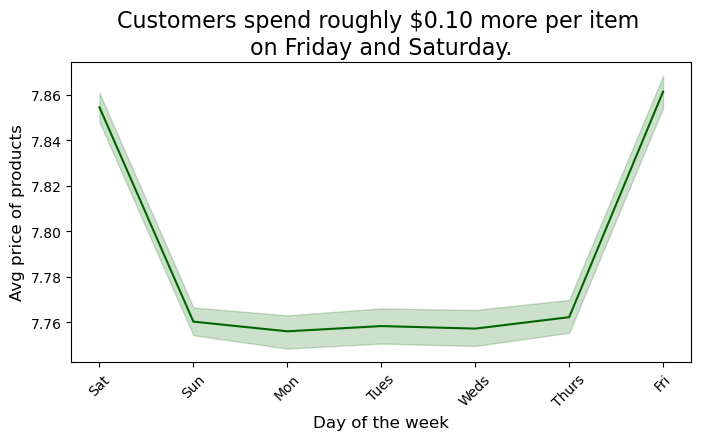

In [16]:
# Formatting the plot to have some white space around it
fig, ax = plt.subplots(figsize=(8,5))

# Creating the plot
line = sns.lineplot(data = df_2, 
                    x = 'order_day_of_week', 
                    y = 'price', 
                    color = 'darkgreen')

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.xticks(dow_xticks, dow, rotation = 45)
plt.xlabel("Day of the week", size=12 )

plt.ylabel("Avg price of products", size=12)

plt.title ("Customers spend roughly $0.10 more per item \non Friday and Saturday.", 
           size=16)


In [17]:
# Exporting line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_prices_dow.png'))

### 0.6.5 Histogram of orders by hour of day

Text(0.5, 1.0, 'The peak ordering window is 9a.m. - 4 p.m.')

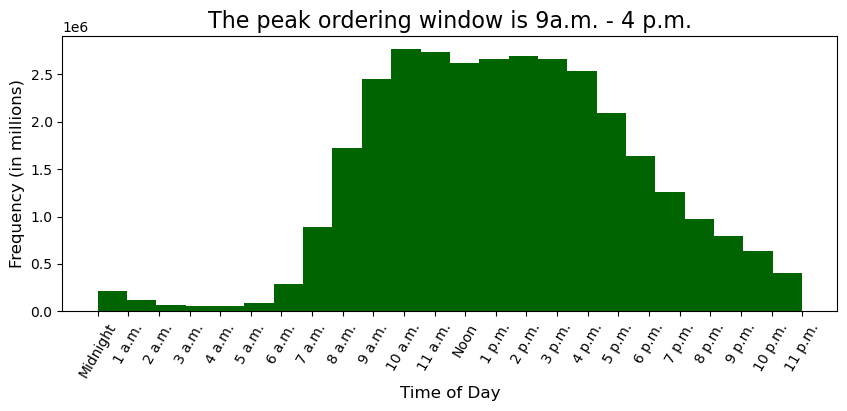

In [20]:
# Making histogram of prices
hist_hod = df['order_hour_of_day'].plot.hist(bins = 24, 
                                             color = 'darkgreen', 
                                             figsize=(10,5))

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.25)

# Format labels and titles for clarity
plt.xticks(hod_xticks, hod, rotation = 60)
plt.xlabel("Time of Day", size=12 )

plt.ylabel("Frequency (in millions)", size=12 )

plt.title ("The peak ordering window is 9a.m. - 4 p.m.", size=16)

This histogram shows that the peak ordering window is from 9 a.m. - 4 p.m.
During the early morning (6-9 a.m.) and evening (4-11 p.m.) there are some orders but fewer than during the peak window.  The fewest orders happen between midnight and 6 a.m.

In [21]:
# Exporting histogram
hist_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour_of_day.png'))

### 0.6.6 Bar chart number of orders by loyalty status

Text(0.5, 1.0, 'Most orders are placed\nby regular customers.')

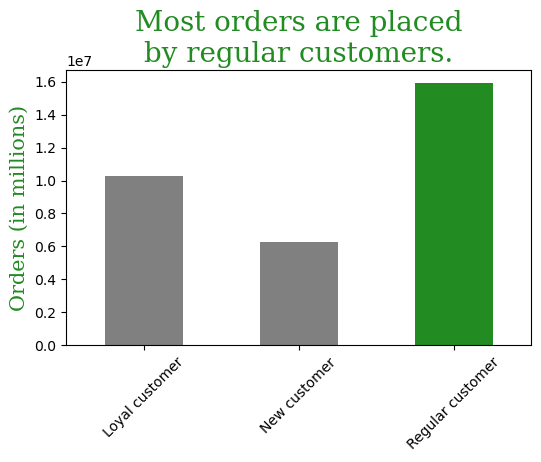

In [26]:
# Make a bar chart for order_day_of_week
bar_loyalty = df['loyalty_flag'].value_counts().sort_index().plot.bar(color =['grey', 'grey', 'forestgreen',], figsize=(6,5))

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.25)

# Format labels and titles for clarity

plt.xticks(rotation = 45)

plt.ylabel("Orders (in millions)", fontdict = font_label )

plt.title ("Most orders are placed\nby regular customers.", 
           fontdict = font_title)

In [27]:
# Exporting bar chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

### 0.6.7 Line chart of prices vs. hours of the day (using random 30% sample)


In [18]:
# Creating two-column subset of the 30% df
df_3 = small[['order_hour_of_day', 'price']]

Text(0.5, 1.0, 'Customers are most frugal about product prices \nin the morning (9-10 a.m.).')

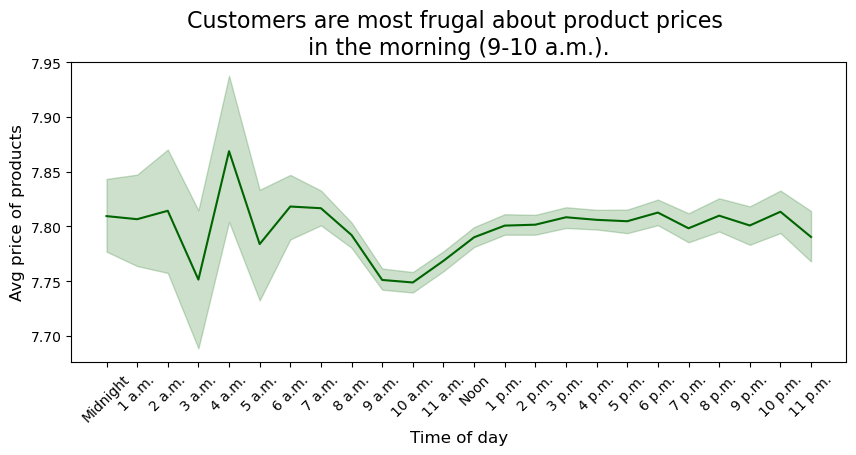

In [19]:
# Formatting the plot to have some white space around it
fig, ax = plt.subplots(figsize=(10,5))

# Creating the plot
line_hod_prices = sns.lineplot(data = df_3, 
                               x = 'order_hour_of_day', 
                               y = 'price' , 
                               color ='darkgreen')

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.xticks(hod_xticks, hod, rotation = 45)
plt.xlabel("Time of day", size=12 )

plt.ylabel("Avg price of products", size=12 )

plt.title ("Customers are most frugal about product prices \nin the morning (9-10 a.m.).", 
           size=16)


In [20]:
# Exporting line chart
line_hod_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_prices_hod.png'))

### 0.6.8 Line chart of age vs. number of dependants (using random 30% sample)


In [31]:
# Creating two-column subset of the 30% df
df_4 = small[['age', 'n_dependants']]

Text(0.5, 1.0, 'Line graph of age vs number of dependants')

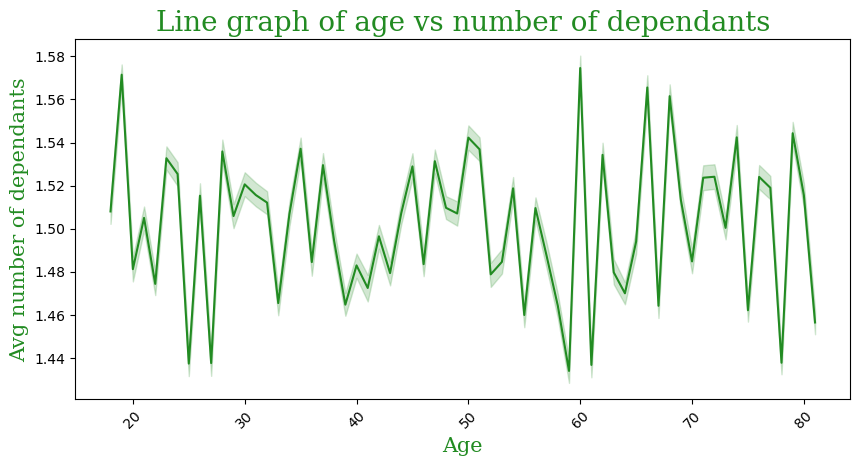

In [32]:
# Formatting the plot to have some white space around it
fig, ax = plt.subplots(figsize=(10,6))

# Creating the plot
line_age_deps = sns.lineplot(data = df_4, x = 'age', y = 'n_dependants', color = 'forestgreen')

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.xticks(rotation = 45)
plt.xlabel("Age", fontdict = font_label )

plt.ylabel("Avg number of dependants", fontdict = font_label )

plt.title ("Line graph of age vs number of dependants", fontdict = font_title)


In [33]:
# Exporting line chart
line_age_deps.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_age_dependants.png'))

This line chart shows that *in this data set* there is no real relationship between age and number of dependants.  

### 0.6.9 Scatterplot of age vs. income (using random 30% sample)


In [15]:
# Creating two-column subset of the 30% df
df_5 = small[['age', 'income']]

Text(0.5, 1.0, 'Customers with a higher income (>$400k)\nare over 40 years old.')

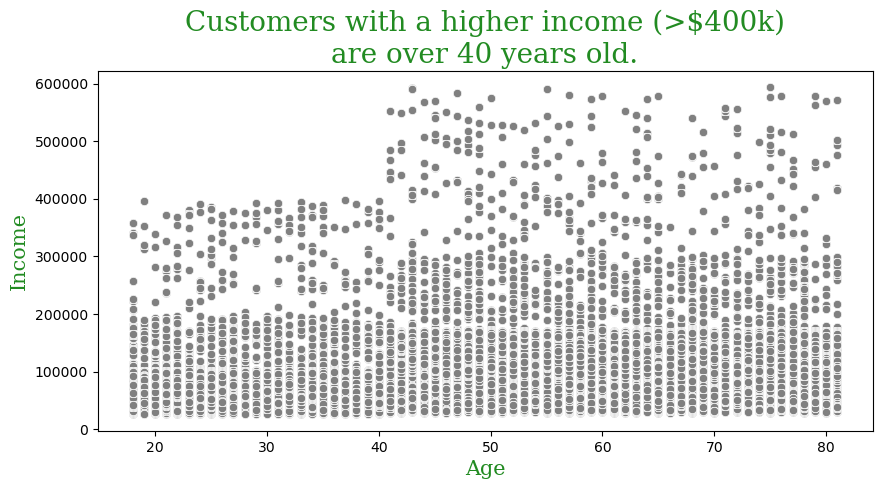

In [16]:
# Formatting the plot to have some white space around it
fig, ax = plt.subplots(figsize=(10,6))

# Making a scatterplot to see if there is a relationship 
# between age and spending power
scat_age_income = sns.scatterplot(x = 'age', 
                                  y = 'income', 
                                  data = df_5, 
                                  color = 'grey')

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.xlabel("Age", fontdict = font_label )

plt.ylabel("Income", fontdict = font_label )

plt.title ("Customers with a higher income (>$400k)\nare over 40 years old.", fontdict = font_title)



This scatterplot shows that among current Instacart customers, only individuals over age 40 might have incomes over 400k.  

In [17]:
# Exporting scatterplot
scat_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

### Stacked bar chart - spender_type by region

Text(0.5, 1.0, 'High spenders make very few orders.\nSoutherners make the most orders.\n')

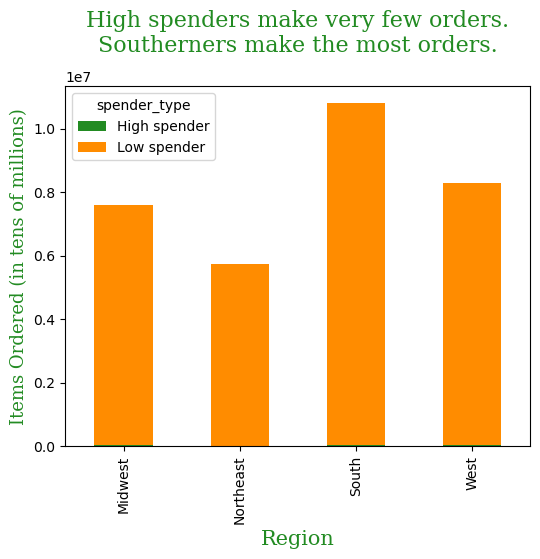

In [37]:
# Make a bar chart for order_day_of_week
spender_bar = df.groupby(['region','spender_type']).size().unstack().plot(kind = 'bar', stacked = True, color = ['forestgreen', 'darkorange'], figsize=(6,6))

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.xlabel("Region", fontdict = font_label )

plt.ylabel("Items Ordered (in tens of millions)", fontdict = font_sm_label )

plt.title ("High spenders order very few items.\nSoutherners order the most items.\n", fontdict = font_sm_title)

In [38]:
# Exporting bar chart
spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spender_type.png'))

In [39]:
# More exploration of what is happening with spender_types

In [40]:
df.groupby('spender_type')['max_order'].describe()

,count,mean,std,min,25%,50%,75%,max
spender_type,,,,,,,,
High spender,119878.0,18.650895,20.135073,3.0,5.0,11.0,24.0,99.0
Low spender,32314611.0,33.105967,25.156125,3.0,13.0,26.0,47.0,99.0


In [41]:
df.groupby('spender_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
spender_type,,,,,,,,
High spender,119715.0,10.578808,4.739758,1.0,7.3,11.2,13.5,25.0
Low spender,32278877.0,7.593279,4.089544,1.0,4.2,7.4,11.2,25.0
